In [1]:
# import packages
import networkx as nx
import numpy as np                                                                 
import random as rd   
import pandas as pd
import matplotlib.pyplot as plt                                                    
import warnings 

In [2]:
df = pd.read_csv('df_formatted.csv')

In [3]:
D = nx.from_pandas_edgelist(df, source='new_id_x', target='new_id_y', edge_attr=None, create_using=nx.DiGraph)

In [4]:
from networkx.algorithms.traversal.depth_first_search import dfs_tree
subtree_at_1 = dfs_tree(D.reverse(), 1)

In [5]:
corenodes = list(subtree_at_1.nodes)
SD = D.subgraph(corenodes)
SD_id = nx.convert_node_labels_to_integers(SD, first_label=0, ordering='default',label_attribute=None) # must keep!
SG_id = SD_id.to_undirected() # make the graph undirected for PPR computation on citation graph

In [6]:
node_num = 1000  # the number of nodes you would like to confirm (exogeneous varible)
boundary = SG_id.number_of_nodes() - node_num
allnodes = list(nx.nodes(SG_id))
newnodes = [e for e in allnodes if e >= boundary]
oldnodes = [e for e in allnodes if e < boundary]

SG_initial = SG_id.subgraph(oldnodes)

In [7]:
def DG13 (x,y,x2,y2): 
    return (x*y + (1-x)*(1-y)) - (x2*y2 + (1-x2)*(1-y2))

In [8]:
all_pprs = []
for i in range(node_num):
    label = i + boundary
    successors = list(SD_id.successors(label))  
    keys = successors
    values = [1] * len(keys)
    dic = dict(zip(keys, values))
    ppr = nx.pagerank(SG_initial, personalization=dic, alpha=0.85) #type: dict
    all_pprs.append(ppr)
    print('Computing PPR for ' + str(i + boundary) + 'th node')
    candidate = [label] + successors
    proposal = SD_id.subgraph(candidate).to_undirected()
    SG_initial = nx.compose(SG_initial, proposal)
#print(all_pprs) # list of dicts

Computing PPR for 421th node
Computing PPR for 422th node
Computing PPR for 423th node
Computing PPR for 424th node
Computing PPR for 425th node
Computing PPR for 426th node
Computing PPR for 427th node
Computing PPR for 428th node
Computing PPR for 429th node
Computing PPR for 430th node
Computing PPR for 431th node
Computing PPR for 432th node
Computing PPR for 433th node
Computing PPR for 434th node
Computing PPR for 435th node
Computing PPR for 436th node
Computing PPR for 437th node
Computing PPR for 438th node
Computing PPR for 439th node
Computing PPR for 440th node
Computing PPR for 441th node
Computing PPR for 442th node
Computing PPR for 443th node
Computing PPR for 444th node
Computing PPR for 445th node
Computing PPR for 446th node
Computing PPR for 447th node
Computing PPR for 448th node
Computing PPR for 449th node
Computing PPR for 450th node
Computing PPR for 451th node
Computing PPR for 452th node
Computing PPR for 453th node
Computing PPR for 454th node
Computing PPR 

Computing PPR for 704th node
Computing PPR for 705th node
Computing PPR for 706th node
Computing PPR for 707th node
Computing PPR for 708th node
Computing PPR for 709th node
Computing PPR for 710th node
Computing PPR for 711th node
Computing PPR for 712th node
Computing PPR for 713th node
Computing PPR for 714th node
Computing PPR for 715th node
Computing PPR for 716th node
Computing PPR for 717th node
Computing PPR for 718th node
Computing PPR for 719th node
Computing PPR for 720th node
Computing PPR for 721th node
Computing PPR for 722th node
Computing PPR for 723th node
Computing PPR for 724th node
Computing PPR for 725th node
Computing PPR for 726th node
Computing PPR for 727th node
Computing PPR for 728th node
Computing PPR for 729th node
Computing PPR for 730th node
Computing PPR for 731th node
Computing PPR for 732th node
Computing PPR for 733th node
Computing PPR for 734th node
Computing PPR for 735th node
Computing PPR for 736th node
Computing PPR for 737th node
Computing PPR 

Computing PPR for 987th node
Computing PPR for 988th node
Computing PPR for 989th node
Computing PPR for 990th node
Computing PPR for 991th node
Computing PPR for 992th node
Computing PPR for 993th node
Computing PPR for 994th node
Computing PPR for 995th node
Computing PPR for 996th node
Computing PPR for 997th node
Computing PPR for 998th node
Computing PPR for 999th node
Computing PPR for 1000th node
Computing PPR for 1001th node
Computing PPR for 1002th node
Computing PPR for 1003th node
Computing PPR for 1004th node
Computing PPR for 1005th node
Computing PPR for 1006th node
Computing PPR for 1007th node
Computing PPR for 1008th node
Computing PPR for 1009th node
Computing PPR for 1010th node
Computing PPR for 1011th node
Computing PPR for 1012th node
Computing PPR for 1013th node
Computing PPR for 1014th node
Computing PPR for 1015th node
Computing PPR for 1016th node
Computing PPR for 1017th node
Computing PPR for 1018th node
Computing PPR for 1019th node
Computing PPR for 1020t

Computing PPR for 1261th node
Computing PPR for 1262th node
Computing PPR for 1263th node
Computing PPR for 1264th node
Computing PPR for 1265th node
Computing PPR for 1266th node
Computing PPR for 1267th node
Computing PPR for 1268th node
Computing PPR for 1269th node
Computing PPR for 1270th node
Computing PPR for 1271th node
Computing PPR for 1272th node
Computing PPR for 1273th node
Computing PPR for 1274th node
Computing PPR for 1275th node
Computing PPR for 1276th node
Computing PPR for 1277th node
Computing PPR for 1278th node
Computing PPR for 1279th node
Computing PPR for 1280th node
Computing PPR for 1281th node
Computing PPR for 1282th node
Computing PPR for 1283th node
Computing PPR for 1284th node
Computing PPR for 1285th node
Computing PPR for 1286th node
Computing PPR for 1287th node
Computing PPR for 1288th node
Computing PPR for 1289th node
Computing PPR for 1290th node
Computing PPR for 1291th node
Computing PPR for 1292th node
Computing PPR for 1293th node
Computing 

In [11]:
signal_prob = 11     
randomness_range = 11
n = 10

result_list = [] # list of lists for expected rewards in each randomness and signal probability
for s in range(signal_prob):
    # signal assignment 
    signal_list = []
    for i in range(SG_id.number_of_nodes()):
        sig = np.random.choice([0, 1], p=[1 - s*0.1, s*0.1])
        signal_list.append(sig)
    
    result = []
    for k in range(randomness_range):
        strategy_list = []
        for j in range(SG_id.number_of_nodes()):
            x = np.random.choice(["truth", "random"], p=[1 - k*0.1, k*0.1])
            strategy_list.append(x)

        reports = [[] for i in range(SG_id.number_of_nodes())] # list of lists for the stock of reports by all 1421 nodes
        rewards = []
        # curator selection and reward computation
        for m in range(node_num): 
            array_k = np.array(list(all_pprs[m].keys()))
            array_v = np.array(list(all_pprs[m].values()))
            curator = []
            # selecting n number of curators by PPR
            while len(curator) < n: 
                new = np.random.choice(array_k, size = n - len(curator), replace = False, p = array_v)
                suc = list(SD_id.successors(m + boundary))
                net_new = [e for e in new if e not in suc]
                curator = list(set(curator + net_new))
            # let each curator report to the node m + boundary
            r_nodes = []
            r_repos = []
            for l in range(n):
                if strategy_list[curator[l]] == "truth":
                    reports[curator[l]].append(signal_list[m + boundary]) # truthful strategy
                else:
                    reports[curator[l]].append(np.random.choice([0, 1], p=[0.5, 0.5])) # fifty-fifty uninformative strategy
                if len(reports[curator[l]]) >= 3:
                    r_repos.append([reports[curator[l]][-1], np.random.choice(reports[curator[l]][:-1])]) # reports for DG13
                    r_nodes.append(curator[l])
            if len(r_nodes) >= 2: # both curator and reference curator need to have at least 3 reports.
                for o in range (len(r_nodes)):
                    x = r_repos[o][0]
                    x2 = r_repos[o][1]
                    sel = list(range(len(r_nodes)))
                    sel.remove(o)
                    c = np.random.choice(sel)
                    y = r_repos[c][0]
                    y2 = r_repos[c][1]
                    rewards.append(DG13(x,y,x2,y2))
        mean = sum(rewards) / len(rewards)
        result.append(mean)
        #print(len(rewards))
    print('Computing expected rewards in case of signal prob ' + str(s * 0.1))
    result_list.append(result)
print('Complete!')  
print(result_list)

Computing expected rewards in case of signal prob 0.0
Computing expected rewards in case of signal prob 0.1
Computing expected rewards in case of signal prob 0.2
Computing expected rewards in case of signal prob 0.30000000000000004
Computing expected rewards in case of signal prob 0.4
Computing expected rewards in case of signal prob 0.5
Computing expected rewards in case of signal prob 0.6000000000000001
Computing expected rewards in case of signal prob 0.7000000000000001
Computing expected rewards in case of signal prob 0.8
Computing expected rewards in case of signal prob 0.9
Computing expected rewards in case of signal prob 1.0
Complete!
[[0.0, -0.002957058369760864, -0.00397792891056076, 0.0007717041800643086, -0.008898632963631675, -0.001926534806062163, 0.005134129123347452, -0.003352675693101225, 0.005670833870344116, 0.005908040071923966, -0.002954020035961983], [0.1944801026957638, 0.1564669580869118, 0.11686808948315762, 0.10138960370560988, 0.09545220966084275, 0.0321584769

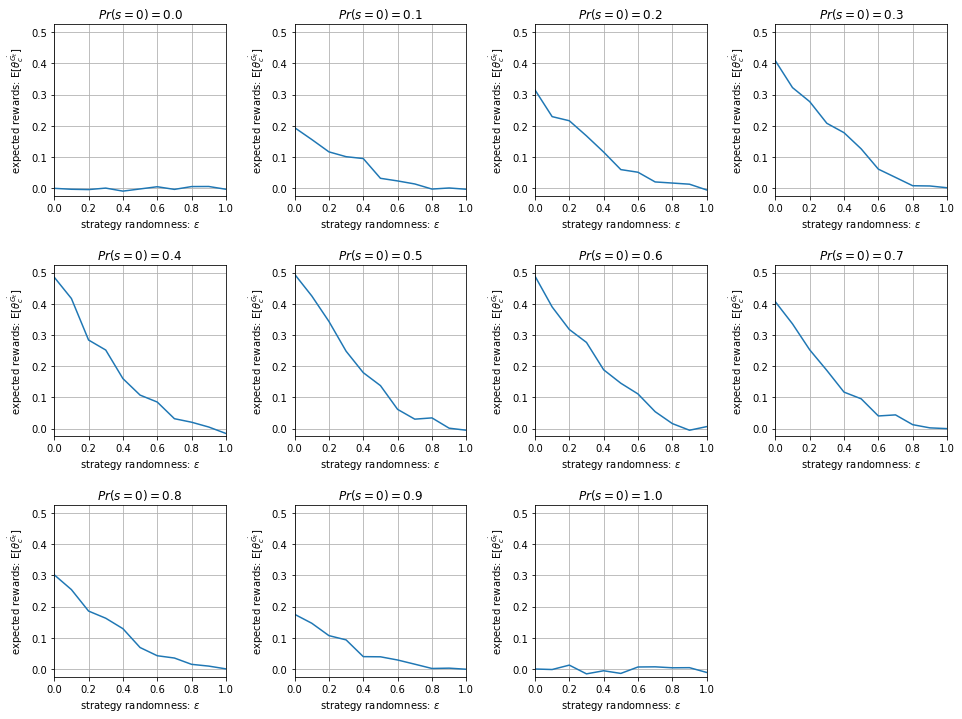

In [50]:
x_range = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

fig = plt.figure(figsize=(16,12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i in range(11):
    x_value = x_range
    y_value = result_list[i]
    ax = fig.add_subplot(3,4,i + 1)
    ax.grid(True)
    ax.set_title('$Pr(s = 0) = $'+ str(x_range[i]))
    ax.set_xlabel('strategy randomness: $\epsilon$')
    ax.set_ylabel('expected rewards: E[$\\theta_{c}^{\dot{G_{t}}}$]')
    ax.set_xlim([0.0,1.0])
    ax.set_ylim([-0.025,0.525])
    ax.plot(x_value, y_value)
    
#plt.savefig("experiment2.png", format = 'png', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()